# **Assignment 3 - Building a Convolutional Neural Network for Image Classification**

### Use of GPUs on Colab
Please run the python code in Google Colab. The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability. You can request one by doing the following:

Rumtime → Change runtime type → T4 GPU


## **Objective**
This assignment focuses on understanding, implementing, and improving a **Convolutional Neural Network (CNN)** architecture to solve image classification problems across different datasets. The task is divided into three parts:

-	Implement the original LeNet-5 architecture to classify handwritten digits from the MNIST dataset
-	Apply the LeNet-5 architecture to a more complex dataset to evaluate its performance on colorful, high-variance natural images compared to simple grayscale digits.
-	Fine-tune the CNN model and propose strategies to enhance its performance on the flower classification task through optimization and architectural improvements.


**Carefully read the instructions provided in the text cells and comments. Respond to all questions using text cells, supported by relevant Python code where appropriate.**

## **Introduction to the MNIST Dataset and LeNet-5**
- The MNIST dataset (Modified National Institute of Standards and Technology) is widely recognized as one of the most important benchmarks in machine learning and computer vision. It comprises 70,000 grayscale images of handwritten digits (0-9), with 60,000 images allocated for training and 10,000 images for testing. Each image has a uniform size of 28x28 pixels, making it ideal for developing and testing image classification algorithms. The dataset's simplicity and well-structured format have made it a popular choice for researchers and practitioners alike, serving as a standard for evaluating new methodologies in digit recognition.

- One of the pioneering architectures designed for image classification tasks is LeNet-5, developed by Yann LeCun et al. in 1998. LeNet-5 is a convolutional neural network specifically tailored for handwritten digit recognition. It consists of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract features from input images and classify them into one of ten categories (digits 0-9).

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# **Data Expolore**

In [ ]:
# The data, split between train and test sets:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [ ]:
print('x_train shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')
print(train_images[0].shape, 'image shape')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape


In [ ]:
# no. of classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)



---


## Question 1: What is the distribution of each digit (0-9) in both the  training and test sets? Write relevant python code below to answer the question

# **Question 1 Answer**

inside the following code and output**

In [ ]:
# Answer for Question 1
train_labels_df = pd.DataFrame(train_labels)
test_labels_df = pd.DataFrame(test_labels)

print('Answer for Question 1')
print(f'Distribution of digits in training set')
print(round((train_labels_df.value_counts()/len(train_labels_df)*100),2).astype(str)+"%")
print('-----------------------')
print(f'Distribution of digits in testing set')
print(round((test_labels_df.value_counts()/len(test_labels_df)*100),2).astype(str)+"%")

Answer for Question 1
Distribution of digits in training set
0
1    11.24%
7    10.44%
3    10.22%
2     9.93%
9     9.92%
0     9.87%
6     9.86%
8     9.75%
4     9.74%
5     9.04%
Name: count, dtype: object
-----------------------
Distribution of digits in testing set
0
1    11.35%
2    10.32%
7    10.28%
3     10.1%
9    10.09%
4     9.82%
0      9.8%
8     9.74%
6     9.58%
5     8.92%
Name: count, dtype: object




---



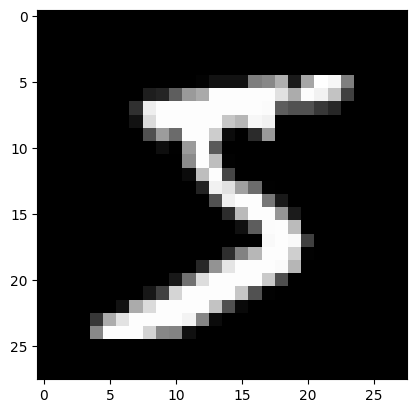

In [ ]:
#let’s see one sample of the dataset
plt.imshow(train_images[0], cmap='gray')

In [ ]:
# self-defined function showing image pixel values of an image

import numpy as np

def img_pixel_superimpose(img, ax):
    w, h = img.shape
    color_map = plt.cm.get_cmap('gray_r')  # gray_reversed
    ax.imshow(img, cmap='gray')
    for x in range(w):
        for y in range(h):
            color = color_map(img[x][y])
            ax.annotate(str(img[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center',
                        color=color)
            plt.axis(False)

/tmp/ipython-input-1561305448.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('gray_r')  # gray_reversed


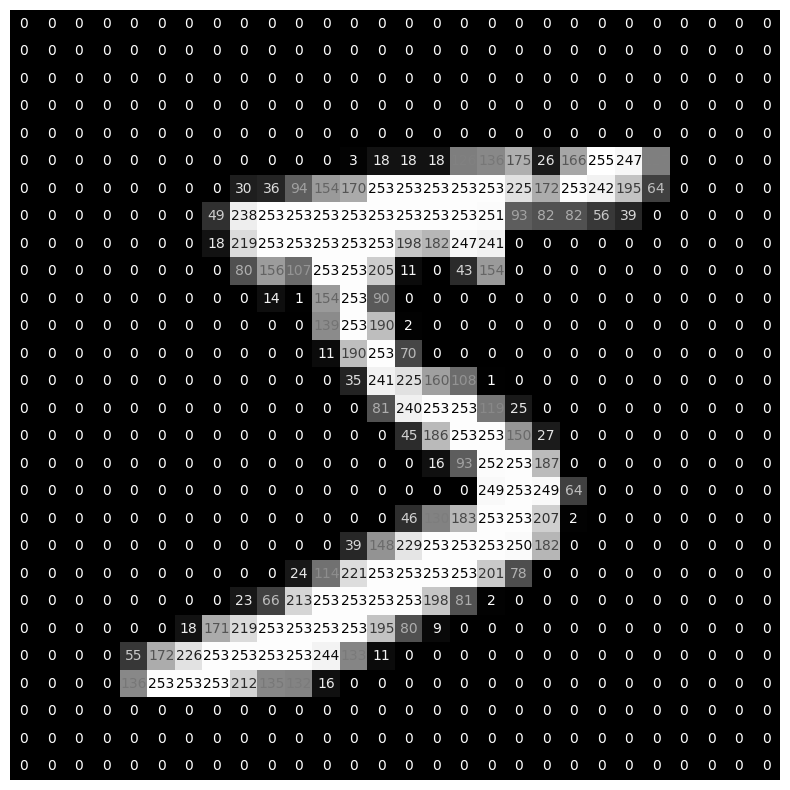

In [ ]:
# plot the image with pixel values

fig = plt.figure(figsize = (10,10))
ax0 = fig.add_subplot(1, 1, 1)

img_pixel_superimpose(train_images[0], ax0)

In [ ]:
# create a list of class names
class_names = ['0 - zero','1 - one','2 - two','3 - three','4 - four','5 - five','6 - six','7 - seven','8 - eight','9 - nine']

<Figure size 1600x400 with 0 Axes>

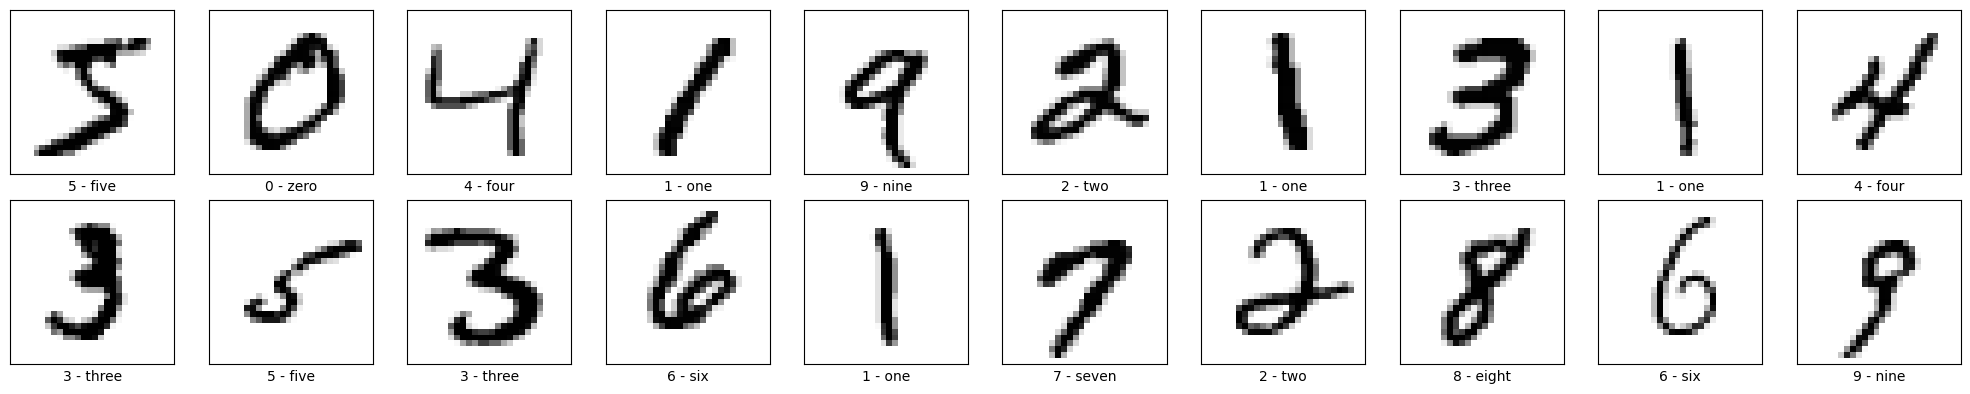

In [ ]:
# Display multiple sample images together to get a better overall sense of the dataset.
fig = plt.figure(figsize=(16, 4))
rows, cols = 2, 10

fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
for i in range(rows*cols):
    ax = axes[i//cols, i%cols]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.imshow(train_images[i], cmap=plt.cm.binary)       # Displays the i-th image in the subplot using a binary colormap (black and white)
    ax.set_xlabel(class_names[train_labels[i]])   # show the class name below the image

plt.tight_layout()
plt.show()



---


### Question 2: What are the pixel value ranges for the images? (e.g., minimum and maximum pixel values) What are the numbers representing? Write relevant python code below to answer the question.




# **Answer to Question 2:**




The pixel value represent the brightness of the pixel. 255 represents the brightest while 0 represents the darkest. The range represent the difference in brightness between the brightest and the darkest.

In [ ]:
# Answer for Question 2
print(f'The range of pixel values of images is: {np.max(train_images)-np.min(train_images)}')

The range of pixel values of images is: 255




---



# **Data Transform**

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

In [ ]:
# Add a new axis
x_train = train_images[:, :, :, np.newaxis]
x_test = test_images[:, :, :, np.newaxis]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape


In the data preprocessing stage, we normalize (scale) the pixel intensities down to the 0-1 range by dividing by 255.



---


### Question 3: Write code to normalize (scale) pixel values in an image dataset. Explain why normalizing pixel values is important. When labels are converted to categorical format, what does the representation look like? Finally, why is it necessary to add an additional axis to the existing image dimensions?


# **Answer for Question 3:**

Code for normalization

In [ ]:
# Write your code below
# Normalize (scale) the datasets
train_images_scaled = train_images/255
test_images_scaled = test_images/255

print('Code Answer for Question 3:')
print('---------------------------')
print('Each pixel is normalized by dividing the value by 255')
print(f'The new minimum is {np.min(train_images_scaled)}')
print(f'The new maximum is {np.max(test_images_scaled)}')

Code Answer for Question 3:
---------------------------
Each pixel is normalized by dividing the value by 255
The new minimum is 0.0
The new maximum is 1.0




**Explain why normalizing pixel values is important.**

Normalizing the pixel intensity values from (0,255) to (0,1) by dividing the values with 255 is important, because

1) Normalization allows all input to be at the same scale, preventing any input features having a large unexpected dominance

2) Large pixel values pass through convolution filters and produce large values representation of features which are fed into the dense layers. Dense layers are poor in handling large-magnitude numerical values because the backpropagation gradient descent will be tilted and become unstable, leading to weights that are not optimal.


**When labels are converted to categorical format, what does the representation look like?**

Numerical values (0-9) are turned into categorical format using one-hot encoding with the following code:

    y_train = to_categorical(train_labels, num_classes)

And the output is:

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

The output is an array, with a format of:

if the label is 0, the first digit inside the array becomes 1, others 0

[1,0,0,0,0,0,0,0,0,0]

if the label is 5, then the sixth digit inside the array becomes 1, others 0

[0,0,0,0,0,1,0,0,0,0]

So that the label would not be considered numerical so there is no order and computations that results in a loss function optimizing against the numerical values 0 to 9.

**Why is it necessary to add an additional axis to the existing image dimensions?**

There are originally three axis dimensions:

1) Number of images
2) rows
3) cols

One more dimension of **number of channels** is added to classify how many values are stored inside one 2D pixel there is per image, if the image is grayscale there is 1 channel, if it is colored then there are 3 (RGB)



---



Below functions are defined for evaluation of training results.

In [ ]:
# plot the accuracy chart
def plot_performance(training_results):
  metric_df = pd.DataFrame(training_results.history)
  metric_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
  plt.grid(True)

In [ ]:
# set up the figure
def plot_prediction(prediction, images, labels, class_names, image_shape=(28,28)):
  fig = plt.figure(figsize=(15, 7))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

  # plot the images: each image is 28x28 pixels
  for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i,:].reshape(image_shape),cmap=plt.cm.gray_r if len(image_shape) == 2 else plt.cm.jet, interpolation='nearest')

    if np.argmax(prediction[i]) == np.argmax(labels[i]):
      # label the image with the blue text
      ax.text(0, 7, class_names[np.argmax(prediction[i])], color='blue')
    else:
      # label the image with the red text
      ax.text(0, 7, class_names[np.argmax(prediction[i])], color='red')

# **LeNet-5 Architecture**

In this step, you will implement the [LeNet-5](https://en.wikipedia.org/wiki/LeNet#/media/File:LeNet-5_architecture.svg) architecture. You can either follow the approach demonstrated during the lab using the `.add()` method to build the model step by step, or use the [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) API  by passing a list of layers *directly*.

The goal is to replicate the original design introduced by Yann LeCun, which consists of alternating convolutional and pooling layers followed by fully connected layers.

Follow the instructions to build the model:

- 1st Convolution layer:
  - Conv2D with 6 filters, a kernel size of (5, 5), stride (1, 1), and tanh activation.
  - Set input_shape to match your training data.  
  - Use padding="same" to preserve spatial dimensions.

- Add an average pooling layer:
  - AveragePooling2D with a pool size of (2, 2) and stride (2, 2).

- 2nd convolutional layer:
  - Use 16 filters, kernel size (5, 5), stride (1, 1), activation tanh.
  - padding="valid".

- Add another average pooling layer:

  - Same configuration as before.

- Flatten the output to convert the 2D feature maps into a 1D vector.

- Add fully connected layers:

  - 1st dense layer with 120 units and tanh activation.
  - 2st dense layer with 84 units and tanh activation.

- Add the output layer:
  - Use Dense(nb_classes, activation='softmax') for classification.


In [ ]:
# Write your code below

input_shape = x_train[0].shape
nb_classes = num_classes

model_LeNet = tf.keras.Sequential([
    #First Convolution
    Conv2D(6,(5,5),strides=1,padding='same',activation='tanh',input_shape=input_shape),
    #Average Pooling
    AveragePooling2D((2,2),strides=2,padding='same'),

    #Second Convolution
    Conv2D(16,(5,5),strides=1,activation='tanh',padding='valid'),
    #Average pooling
    AveragePooling2D((2,2),strides=2),

    #Flatten
    Flatten(),

    #Dense Layers
    Dense(units=120,activation='tanh'),
    Dense(units=84,activation='tanh'),
    Dense(nb_classes,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now, Compile the model:

- Use optimizer='adam'.
- Set the loss function based on your label format.
- Include metrics=['accuracy'].

Explore [CategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) and [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy)

In [ ]:
# Write your code below
model_LeNet.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



---


### Question 4: What is the difference between these two loss function settings, and which one is appropriate for this case?

---
# **Answer for Question 4**

The major difference between categorical_crossentropy and sparse_categoricalcrossentropy is that categorical_crossentropy handles categorical (one-hot encoding) labels

like [0,1,0,0,0] (label represents 1)

while sparse_categoricalcrossentropy handles numerical labels like

1 (label represents 1)

Here,

Categorical_crossentropy is appropriate for this case because our label is in a categorical one-hot encoded format as explained in question 3, like this:

[1,0,0,0,0,0,0,0,0,0]

So we use categorical_crossentropy to handle this categorized data (which is turned from numerical to categorical in previous steps)

---



### Question 5: Use the `.summary()` method to display the model architecture and the number of parameters in each layer. For every layer, explain with calculation steps how the parameter count is calculated.

In [ ]:
# Write your code below
model_LeNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

---
# **Answer to Question 5**

Parameter Calculation

**Parameters are the values that are being optimized, there are no parameters involved in pooling and flatten processes because everything are not being optimized, instead are predefined procedures or computations.**

Dense layers and convolution layers involve parameters.
First Conv2d layer:

(kernel x dimension * kernel y dimension + 1 bias) * number of filter kernels = number of parameters

-> (5x5 input +1 bias)x6 = 156

Second Conv2d layer:

(kernel x dimension * kernel y dimension + 1 bias) * number of filter kernels = number of parameters

-> (5x5x6 input +1 bias)x16 = 2416

Input into the dense layer:
-> 400



First Dense Layer (Dense):
number of parameters = (no of nodes in previous layer+1)*number of nodes this layer

-> (400 + 1) x 120 = 48120

Second Dense Layer (Dense_1)
number of parameters = (no of nodes in previous layer+1)*number of nodes this layer
-> (120 + 1) x 84 = 10164


Third Dense Layer (Dense_2)
number of parameters = (no of nodes in previous layer+1)*number of nodes this layer
-> (84+1) x 10 = 850


---



Train the model for 20 epochs and use the validation set to monitor potential overfitting issues.

In [ ]:
# Write your code below
model_LeNet.fit(x_train,y_train, epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9183 - loss: 0.2816 - val_accuracy: 0.9717 - val_loss: 0.0856
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0672 - val_accuracy: 0.9837 - val_loss: 0.0513
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0456 - val_accuracy: 0.9831 - val_loss: 0.0532
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0380 - val_accuracy: 0.9860 - val_loss: 0.0458
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0322 - val_accuracy: 0.9847 - val_loss: 0.0499
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9859 - val_loss: 0.0441
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9916 - loss: 0.0242 - val_accuracy: 0.9777 - val_loss: 0.0703
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0221 

Use the self-defined functions `plot_performance` and `plot_prediction` to visualize the training results and prediction outputs through charts and images.

## Question 6: Provide a thorough report of your observations, including an evaluation of the model’s performance and any insights gained from the visualizations.

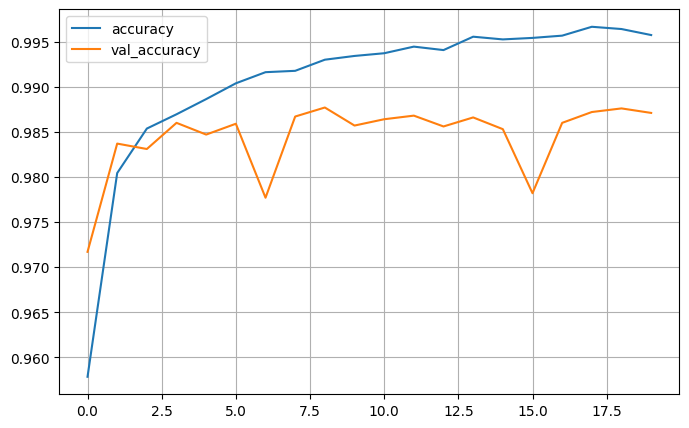

In [ ]:
# Write your code below
plot_performance(model_LeNet.history)

In [ ]:
model_prediction = model_LeNet.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


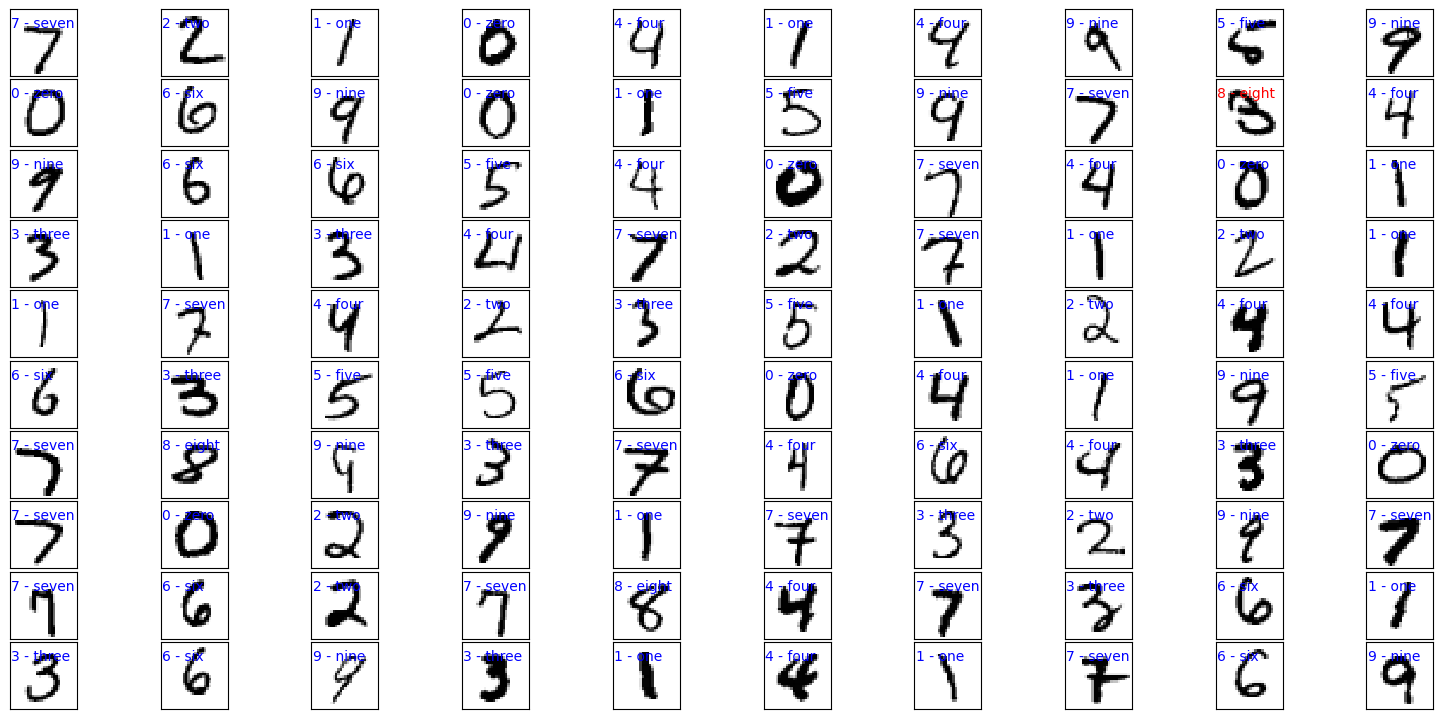

In [ ]:
plot_prediction(model_prediction, x_test,y_test, class_names, (28,28))



---


# **Answer for Question 6:**

**1. Model performance observation and explanation**

Initially, (from around 0 to ~1 epoch), the accuracy of the validation set is significantly higher, while the slope of the training set accuracy is steep upward.

This might be due to the fact that the model has not yet fit the training data patterns since it was just the beginning of the re-weight process in backpropagation, but by probability the validation set aligned better with the random weights in the initial stages.


Between epoch = ~1 to ~3, the training and validation accuracy converges and the training accuracy slope starts flattening.

This means that the model is trained to a decent state where the performance starts to become more stably accurate (compared to epoch < 1).

For epoch > ~3, the training accuracy starts to go higher than the validation accuracy, but with a very small gap (difference of accuracy < 0.01) and a very stable difference, while both the validation and training accuracy attains a near-plateau.


This shows that the model starts to overfit a bit, but the power of the model increases to a maximum point as reflected by the plateau-like validation accuracy.

The maximum validation accuracy is attained at a bit higher than 17.5 epoch.

However, for all epoch > 5, the fluctuation is small, that means the maximum power at 17.5 epoch might be due to noises of the validation set, instead of a real maximum model prediction capabilities.


**2. Other Insights or Observations**

a) The predictions are much more accurate than we have thought, at a ~99% accuracy. Notably, we ourselves couldn't recognize the "4" in row 4, col 4, but the machine does.

b) There does not have to be a large number of epochs for the model performance to be powerful, as proven by the early convergence at around epoch = ~1 and the subsequent stable validation performance.

---



# **TF Flowers Dataset**
The TF Flowers dataset is a collection of flower images commonly used for image classification tasks. It contains photographs of five different flower species: daisy, dandelion, roses, sunflowers, and tulips. The images vary in size, color, and background complexity, making the dataset suitable for testing models on real-world, high-variance image data. This dataset is available through TensorFlow Datasets (tfds) and is often used to demonstrate transfer learning, data augmentation, and fine-tuning techniques in computer vision.

# **Data Expolore**

## Question 7: What is the proportion of the data split, and how many samples are included in each subset after splitting? How many classes are in the dataset, what are their names, and how are the labels represented and stored?


---
# **Answer for Question 7:**
- The Proportion of the data split: 80% training, 10% validation, and 10% test
- Samples included after splitting:
  * Number of training samples: 2936
  * Number of validation samples: 367
  * Number of test samples: 367
- Number of classes in the dataset: 5 ('dandelion', 'daisy', 'tulips', 'sunflowers', 'roses')
  * Labels are stored as integer indices (0–4) that map to these class names through metadata.features['label'].names
---

In [ ]:
# Load the TF Flowers dataset from TensorFlow Datasets
import tensorflow_datasets as tfds

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
# Complete the code below
# How many samples are included in each subset?
train_count = sum(1 for _ in train_ds)
val_count = sum(1 for _ in val_ds)
test_count = sum(1 for _ in test_ds)

print(f"Number of training samples: {train_count}")
print(f"Number of validation samples: {val_count}")
print(f"Number of test samples: {test_count}")

Number of training samples: 2936
Number of validation samples: 367
Number of test samples: 367


In [ ]:
flower_class_names = metadata.features['label'].names
flower_class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

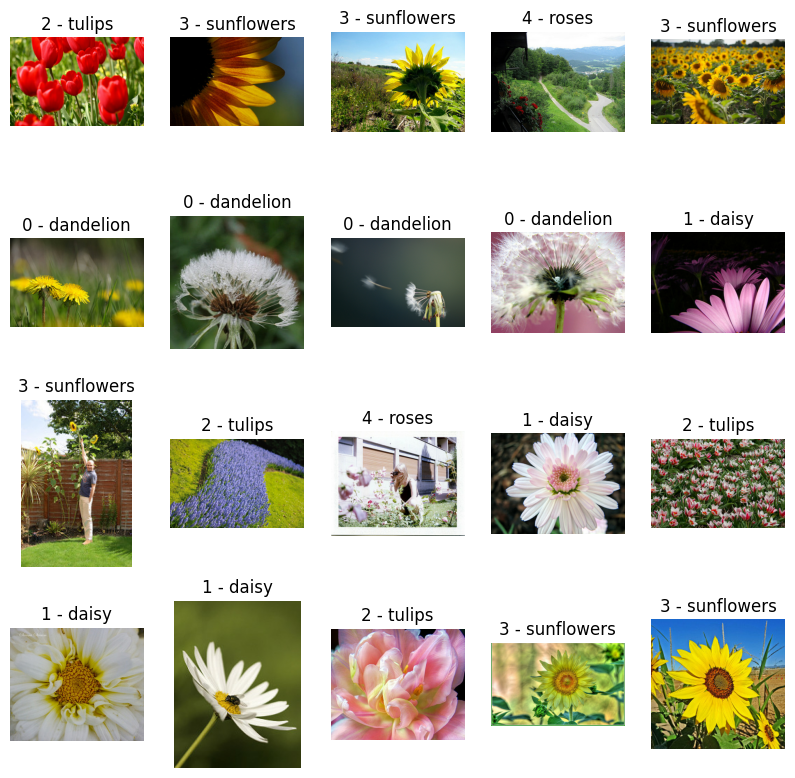

In [ ]:
# Visualize the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(20)):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.title(f"{int(label)} - {flower_class_names[int(label)]}")
    plt.axis("off")


## Question 8: After observing the plotted images, what issues can you identify, and what steps should be taken to address them? Explain the data preprocessing process required for this case.

---
# **Answer for Question 8:**  
- **Identified issues:**
  1.   These plotted images have different sizes, aspect ratios, backgrounds, and brightness levels
  2.   This makes a CNN hard to learn consistent patterns if we fed the data directly
- **To address the issues -> Rationale for the data preprocessing process**
  1. All images should be resized to a fixed 150×150 resolution -> CNN could receive inputs with consistent height and width
  2. They should also be converted from TensorFlow datasets to NumPy arrays -> Image tensors and labels could be handled as standard (None,150,150,3) and (None,) arrays for model training
  3. Pixel values should be normalized by dividing by 255 to keep inputs in a 0–1 range -> This could stabilize gradient descent and speeds up convergence
  4. Labels (0-4) should be extracted into separate arrays to represent the five flower classes -> The model could train on (images, label) pairs efficiently
---

In [ ]:
# resize the images
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
# transform the datasets to numpy array
train_images = np.array([images for images, labels in train_ds])
val_images = np.array([images/255 for images, labels in val_ds])
test_images = np.array([images/255 for images, labels in test_ds])

train_labels = np.array([labels for images, labels in train_ds])
val_labels = np.array([labels for images, labels in val_ds])
test_labels =np.array([labels for images, labels in test_ds])

In [ ]:
# write your code below
# normalization
train_images_norm = train_images / 255
val_images_norm = val_images
test_images_norm = test_images

Implement the LeNet-5 architecture to build a classification model. You may reuse the code from the previous step with **any necessary adjustments**. After building the model, compile it, train it, and carefully observe the results.

In [ ]:
# Write your code below
input_shape = train_images_norm.shape[1:]
num_classes = len(metadata.features['label'].names)


model_flowers = tf.keras.Sequential([
# First Convolution
Conv2D(6, (5, 5), strides=1, padding='same', activation='tanh', input_shape=input_shape),
#Average Pooling
AveragePooling2D((2, 2), strides=(2, 2), padding='same'),


# Second Convolution
Conv2D(16, (5, 5), strides=(1, 1), padding='valid',activation='tanh'),
# Average Pooling
AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),


# Flatten
Flatten(),


# Dense Layers
Dense(units = 120, activation='tanh'),
Dense(units = 84, activation='tanh'),
Dense(num_classes, activation='softmax')
])


model_flowers.summary()


model_flowers.compile(
loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

model_flowers.fit(
train_images_norm, train_labels,
validation_data=(val_images_norm, val_labels),
epochs=20,
verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)             │ (None, 150, 150, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_103           │ (None, 75, 75, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 71, 71, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_104           │ (None, 35, 35, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 19600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 120)            │     2,352,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 5)              │           425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,365,581 (9.02 MB)

 Trainable params: 2,365,581 (9.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.2747 - loss: 1.9679 - val_accuracy: 0.3597 - val_loss: 1.4096
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3900 - loss: 1.3487 - val_accuracy: 0.3896 - val_loss: 1.2887
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4410 - loss: 1.2852 - val_accuracy: 0.3924 - val_loss: 1.2940
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4743 - loss: 1.2279 - val_accuracy: 0.4605 - val_loss: 1.2893
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4796 - loss: 1.2239 - val_accuracy: 0.4578 - val_loss: 1.2747
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4695 - loss: 1.2253 - val_accuracy: 0.4550 - val_loss: 1.2457
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5233 - loss: 1.1586 - val_accuracy: 0.4360 - val_loss: 1.2498
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4990 - loss: 1.1839 - val_accuracy: 0.4332 - v

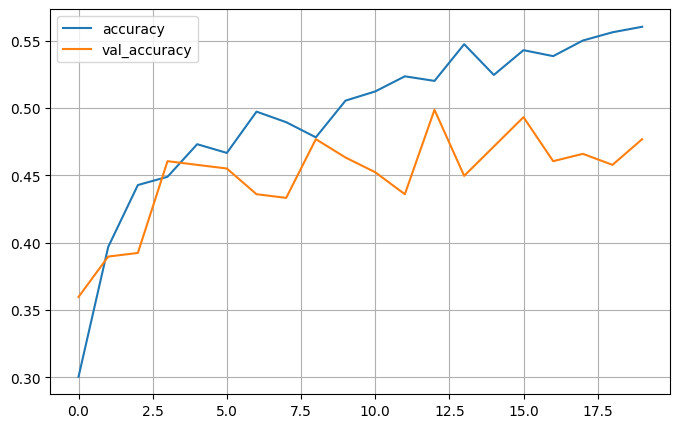

In [ ]:
plot_performance(model_flowers.history)

## Question 9: Report your observations on the training results and compare them with the model built on MNIST. Explain the differences in performance, identify the causes of these issues, and propose solutions to address them. You will implement your suggested improvements in the next section.

---
# **Answer for Question 9:**
- **Observation on training results**
  1. The validation accuracy is very low at around 50%.
  2. Training accuracy is also low, at around 50%-55%
  3. Validation accuracy and training accuracy converges fast (around 0-2.5 epoch), but validation result only goes plateau after epoch > 10
  4. Validation loss is high at around 1.30
  5. Optimal number of epochs was not known with a predefined epoch = 20

- **Comparison in observation with model built on MNIST**
  1. The model built on MNIST reached a very high accuracy (above 98%) on both training and validation sets
  2. Validation loss for the model built on MNIST is much lower at 0.05
  3. This shows that the model built on MNIST fit and generalize the MNIST task itself much better

- **Explanation for the differences in Performance and Causes**
  1. *Overall (validation+training) accuracy is low because of the Large difference in complexity in features in classes. (Convolutions not enough to handle flower features)*

  * Images in the TF Flower dataset is much more complex (than the digits in MNIST), having higher resolution and more sophisticated features in different classes.
  
  * Therefore, the MNIST model's convolution layers cannot handle the flowers well. the small number of convolution layers and small number of filters cannot represent the flowers' features accurately, leading to low accuracy in both the validation and the training set.


  2. Lack of modern regularization and optimization techniques*
  * There are no BatchNormalization, Dropout, and limited augmentation
  * Therfore, the training is less stable and the network either underfits or gets stuck in a suboptimal region



- **Proposed Solutions -> Improvement Areas**
  1. Using a deeper CNN blocks with more filters (eg. 32–64–128) and having ReLu activations -> To increase model capacity and improve the gradient flow so that the model can represent flowers' sophisticated features
  2. Adding Dropout -> To prevent overfitting and improve generalization, stablizing training
  3. Introducing data augmentation (eg. random flips, rotations, zoom, brightness changes) -> To make the model robust to background variation
  4. Introducing early_stop with call_back to find the optimal number of epochs.

# Model Fine-Tuning and Performance Improvement

In this section, you are encouraged to implement any strategies you have proposed to improve the model’s performance. These strategies may include techniques covered in the course or methods beyond the scope of the lectures.

Regardless of the approach you choose, you must clearly explain the rationale behind your method, describe the steps taken, and justify why it is expected to enhance the model’s accuracy or generalization.

Your explanation should demonstrate a solid understanding of the problem and the reasoning behind your solution.

Only include the final version of your model and training results in the code cells below. In your report, provide a brief but clear elaboration of the fine-tuning milestones, explaining what changes were made and why.



In [ ]:
#Alternative Model
# Write your code below
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D
from tensorflow.keras import layers, models

input_shape = train_images_norm.shape[1:]
num_classes = len(metadata.features['label'].names)

alt_flower_model = tf.keras.Sequential([

    #Higher number of convolutions help in identifying features in complex flower
    #structures
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    AveragePooling2D((2,2)),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    AveragePooling2D((2,2)),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    AveragePooling2D((2,2)),

    Flatten(),

    #One layer of less nodes dense layer prevent overfitting on small dataset
    Dense(units = 32, activation='relu'),

    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
alt_flower_model.summary()

alt_flower_model.compile(
loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

#apply early stop to see when does the model work best
early_stop = tf.keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=10,
restore_best_weights=True,
)

alt_flower_model.fit(
train_images_norm, train_labels,
validation_data=(val_images_norm, val_labels),
epochs=200,
callbacks=[early_stop],
verbose=1,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_129 (Conv2D)             │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_126           │ (None, 75, 75, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_130 (Conv2D)             │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_127           │ (None, 37, 37, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_131 (Conv2D)             │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_128           │ (None, 18, 18, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_37 (Flatten)            │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 32)             │     1,327,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,549 (5.42 MB)

 Trainable params: 1,420,549 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.3384 - loss: 1.5341 - val_accuracy: 0.4169 - val_loss: 1.2889
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4378 - loss: 1.3244 - val_accuracy: 0.5368 - val_loss: 1.2011
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4704 - loss: 1.2279 - val_accuracy: 0.5940 - val_loss: 1.0755
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5088 - loss: 1.1894 - val_accuracy: 0.5777 - val_loss: 1.0957
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5641 - loss: 1.1050 - val_accuracy: 0.6730 - val_loss: 0.9422
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6007 - loss: 1.0046 - val_accuracy: 0.6703 - val_loss: 0.9335
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6409 - loss: 0.9336 - val_accuracy: 0.6839 - val_loss: 0.8863
Epoch 8/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6596 - loss: 0.8539 - val_accuracy: 0.

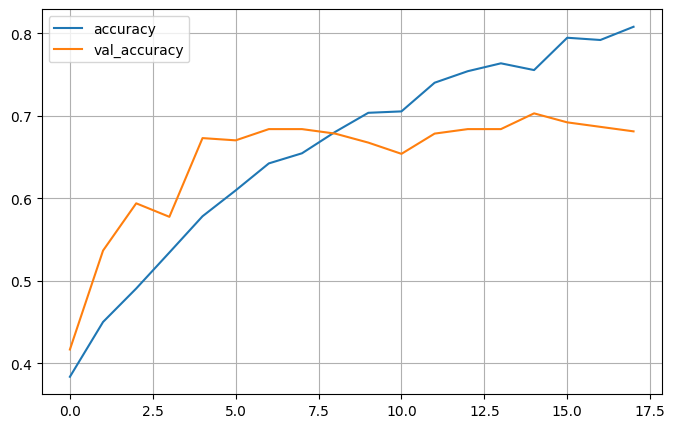

In [ ]:
plot_performance(alt_flower_model.history)

---
# **Answer for Question 10:**

***Rationale Behind Approaches***

**1)We largely increased the number of filters and the number of convolution layers, from 2 layers with 6 and 16 filters to 3 layers with 32, 64, and 128 filters.**

We identified a problem in the first flower model that the validation accuracy is extremely low, at around 50% max.

The complexity of images of flowers are much higher than that of digits, so the digit datasets' simple convolution layers were not sophisticated enough to handle the flower images.

Much more convolutions and filters are needed to extract and represent the features well so as to increase model accuracy, and therefore we increased both the number of layers and the number of filters per layers.



**2)After CNN tuning, we faced severe overfitting. We reduced the number of dense Layer and nodes from [output layer plus two layers with 120 and 84 units each] to [output layer plus one layer with just 32 units].**

After increasing the power of the CNN layers, we found that the model training accuracy goes >90% in within 10 epochs while validation accuracy stayed at around 60-70%, signalling overfitting.

Compared to the first dataset (digits, with 60000 training samples), the flower dataset only contains 2936 training samples. A complex dense layer would easily lead to overfitting (exactly what we observed from part 9) given the small amount of training data, and we had to address this issue.

Therefore, we reduced the complexity of the dense layer to reduce overfitting, both by reducing the number of layers and the number of nodes.


**3)We added Dropout(0.5) into the model to reduce overfitting**

The objective was similar to the reduction in dense layer, to reduce overfitting. Dropout(0.5) means we make half of the activation ZERO, introducing randomness like random forest to decision trees, to address overfitting.


**4)Introduced the early_stop function to auto-find optimal epochs**

We found it difficult to pinpoint an optimal number of epochs where convergence just occurred and the validation accuracy just reached a plateau (meaning overfitting is minimal, while validation accuracy is maximal).

Therefore, we introduced the early_stop function that stops the epoch training when the validation accuracy improvement stops for 10 epochs then end the training.

This helped in finding an optimal number of epochs.

**5)We replaced the 'tanh' activation function with 'ReLu'**

After increasing the size of the convolution layers, we found out the model training became much more inefficient, requiring >100 epochs for convergence.

Therefore, we changed the activation function from 'tanh' to 'relu' in order to try with the major activation function learnt in class, it worked.

**6)We abandoned the data augmentation part because no significant improvements are brought**

We initially tried this code as data augmentation before model building
```
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.RandomContrast(0.1),
])
```
However, results show this addition was not value-adding, so it was abandoned.


**Key Milestones**

**1)Reduction in overfitting**

After the reduction in the layers count and the number of nodes in the dense layer, the overfitting problem was alleviated with the training accuracy not reaching >0.9 within a few epochs like the original one did. Instead, the training accuracy increased stably and the final performance exhibited decent convergence.

**2)Huge leap in validation accuracy**

After using more complex convolution layers and more filters, the validation accuracy increased to around 0.7 from 0.5.

**3)Huge reduction in number of epochs needed**

After changing the activation to 'ReLu' from 'tanh', the training epoch required drastically decreased without compromising the accuracy, returning from >100 epochs needed to around 10-30, substantially improving efficiency.



After all the improvements made, the model performance enhanced, with validation accuracy going towards 70%, no significant overfitting, and a small number fo required epochs.



  ---